<a href="https://colab.research.google.com/github/Saket03-P/Ethereum-Transactions-Fraud-Detection/blob/main/MP_CTGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synthetic Data Generation for Ethereum Transactions Fraud Dataset using CTGANSynthesizer from sdv package

[CTGANSynthesizer Docs](https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/ctgansynthesizer)

[CTGAN Loss Functions](https://colab.research.google.com/drive/1RbIYxkbPP3JQY7W0S1p_XprY25wOYTPL?usp=sharing&ref=sdv.ghost.io)

[CTGAN Issue #980](https://github.com/sdv-dev/SDV/discussions/980)

- Connect to GPU Runtime for faster execution of the synthesizer.

In [1]:
# Restart runtime on running the following cell for the 1st time.
%pip install sdv==1.0.0rc0
%pip install sdmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Press** `Ctrl + M.` **to Restart Runtime on running the above installation command**

In [2]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Mounting Google Drive for the csv files.

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# This cell is meant to be run when the runtime is RESTARTED.
# due to the installing of packages from pip.

dir_path= '/content/gdrive/MyDrive/Cost Sensitive Approach for Ethereum Transactions Fraud Detection using Machine Learning'
df_name= 'pre_processed_transaction_dataset.csv'

dfc= pd.read_csv(dir_path + '/' + df_name)
dfc.sample(5)

,Unnamed: 0,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
4798,4798,Non - Fraud,0.00,0.35,3515.13,0,9999,1,389310.745600,54.057505,0.000000,0.000000,540520.989100,156.523,200.0,0.0,2.0,9.0,294,91
3492,3492,Fraud,0.00,1167.90,29197.45,0,25,1,20.000000,1.545733,0.000000,0.000000,38.643331,0.000,0.0,0.0,0.0,0.0,-1,-1
1050,1050,Non - Fraud,19.12,0.00,57.37,3,1,0,101.000000,101.000000,33.666149,100.998446,0.001554,0.000,0.0,0.0,0.0,0.0,4,3
8573,8573,Non - Fraud,164.72,0.00,329.43,2,1,0,101.000000,101.000000,50.499487,100.998974,0.001026,0.000,0.0,0.0,0.0,0.0,4,3
4377,4377,Non - Fraud,3.02,1654.40,187287.73,113,113,0,0.750558,0.209202,0.208782,23.592334,0.047460,0.000,0.0,0.0,0.0,0.0,4,3


In [6]:
# since the csv file creation causes an extra column to be appended to the dataframe.

dfc.drop(['Unnamed: 0'], axis= 1, inplace= True)

In [8]:
# Obtain the dataset metadata.
from sdv.metadata import SingleTableMetadata

metadata= SingleTableMetadata()

In [9]:
metadata.detect_from_dataframe(data= dfc)
metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "FLAG": {
            "sdtype": "categorical"
        },
        "Avg min between sent tnx": {
            "sdtype": "numerical"
        },
        "Avg min between received tnx": {
            "sdtype": "numerical"
        },
        "Time Diff between first and last (Mins)": {
            "sdtype": "numerical"
        },
        "Sent tnx": {
            "sdtype": "numerical"
        },
        "Received Tnx": {
            "sdtype": "numerical"
        },
        "Number of Created Contracts": {
            "sdtype": "numerical"
        },
        "max value received ": {
            "sdtype": "numerical"
        },
        "avg val received": {
            "sdtype": "numerical"
        },
        "avg val sent": {
            "sdtype": "numerical"
        },
        "total Ether sent": {
            "sdtype": "numerical"
        },
        "total ether balance": {
            "sdtype": "numerical"
        },

In [11]:
EPOCHS= 1500

In [12]:
%%capture output
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(metadata, epochs= EPOCHS, verbose= True, enforce_min_max_values= True)
synthesizer.fit(dfc)

In [39]:
# save model with a descriptive name that includes the dataset and epochs

pkl_file= f'ctgan_model_ethereum_fraud_transactions_dataset_{EPOCHS}_epochs_2.pkl'
synthesizer.save(pkl_file)

In [40]:
# Also save the model to our google drive folder

!cd '/content/'
!cp ctgan_model_ethereum_fraud_transactions_dataset_1500_epochs_2.pkl '/content/gdrive/MyDrive/Cost Sensitive Approach for Ethereum Transactions Fraud Detection using Machine Learning'

In [ ]:
# # only for loading the synthesizer back.
# from sdv.single_table import CTGANSynthesizer

# synthesizer= CTGANSynthesizer.load(filepath= dir_path + '/' + pkl_file)

In [19]:
dfsyn= synthesizer.sample(num_rows= dfc.shape[0])
dfsyn.sample(5)

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
7918,Fraud,10403.33,143.690029,0.000000,12,1,0,0.000000,0.000000,5.786180,0.000000,-705.231606,0.0,1.095969e+06,0.0,0.0,2.0,0,72
9516,Non - Fraud,11.17,0.000000,9862.642257,3,19,0,80.627630,31.230526,43.824237,0.000000,-402.833620,0.0,1.101371e+06,0.0,0.0,0.0,3,2
6895,Non - Fraud,197.07,0.850000,5922.953943,5,2,0,8.066042,0.000000,4.886653,362.835496,-502.831501,0.0,0.000000e+00,0.0,0.0,1.0,3,74
1866,Non - Fraud,33.77,55.979965,12243.431712,4,4,0,67.442086,0.000000,2.903225,0.000000,-747.415108,0.0,5.865770e+06,0.0,0.0,0.0,2,1
7208,Non - Fraud,0.00,1447.072005,18233.566172,0,275,0,43.701365,0.000000,0.000000,32.241798,-1561.330363,0.0,3.404972e+06,0.0,0.0,0.0,270,3


In [20]:
dfsyn.shape

(9841, 19)

In [22]:
# from sdv.single_table import run_diagnostic
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report= run_diagnostic(real_data= dfc, synthetic_data= dfsyn, metadata= metadata)

Creating report: 100%|██████████| 4/4 [04:59<00:00, 74.86s/it]


DiagnosticResults:

SUCCESS:
✓ The synthetic data covers over 90% of the categories present in the real data
✓ Over 90% of the synthetic rows are not copies of the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data

DANGER:
x The synthetic data is missing more than 50% of the numerical ranges present in the real data


In [23]:
# CTGAN prints out a new line for each epoch
epochs_output= str(output).split('\n')

# CTGAN separates the values with commas
raw_values= [line.split(',') for line in epochs_output]
loss_values= pd.DataFrame(raw_values)[:-1] # convert to df and delete last row (empty)

# Rename columns
loss_values.columns= ['Epoch', 'Generator Loss', 'Discriminator Loss']

# Extract the numbers from each column 
loss_values['Epoch']= loss_values['Epoch'].str.extract('(\d+)').astype(int)
loss_values['Generator Loss']= loss_values['Generator Loss'].str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
loss_values['Discriminator Loss']= loss_values['Discriminator Loss'].str.extract('([-+]?\d*\.\d+|\d+)').astype(float)

# the result is a row for each epoch that contains the generator and discriminator loss
loss_values.head()

,Epoch,Generator Loss,Discriminator Loss
0,1,0.0477,-1.2966
1,2,-1.7461,-0.2543
2,3,-2.0664,0.0782
3,4,-1.0280,-0.0590
4,5,-1.2910,0.2872


In [24]:
import plotly.graph_objects as go

# Plot loss function
fig= go.Figure(data= [go.Scatter(x= loss_values['Epoch'], y= loss_values['Generator Loss'], name= 'Generator Loss'),
  go.Scatter(x= loss_values['Epoch'], y= loss_values['Discriminator Loss'], name= 'Discriminator Loss')])

# Update the layout for best viewing
fig.update_layout(template= 'plotly_white',
  legend_orientation= 'h',
  legend= dict(x= 0, y= 1.1))

title= 'CTGAN Loss Function for: Ethereum Transactions Fraud Dataset'
fig.update_layout(title= title, xaxis_title= 'Epoch', yaxis_title= 'Loss')
fig.show()

In [25]:
from sdv.evaluation.single_table import evaluate_quality

quality_report= evaluate_quality(dfc, dfsyn, metadata)

Creating report: 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]



Overall Quality Score: 84.05%

Properties:
Column Shapes: 72.83%
Column Pair Trends: 95.28%


In [26]:
quality_report.get_visualization('Column Shapes')

In [27]:
from sdv.evaluation.single_table import get_column_plot

# Loop over the columns and generate a plot for each one
for col in dfc.columns:
  fig= get_column_plot(real_data= dfc, synthetic_data= dfsyn, column_name= col, metadata= metadata)
  fig.show()

In [ ]:
# Avg min between sent tnx: Average time between sent transactions for account in minutes
# Avg_min_between_received_tnx: Average time between received transactions for account in minutes
# Time_Diff_between_first_and_last(Mins): Time difference between the first and last transaction
# Sent_tnx: Total number of sent normal transactions
# Received_tnx: Total number of received normal transactions
# Number_of_Created_Contracts: Total Number of created contract transactions
# Max_Value_Received: Maximum value in Ether ever received
# Avg_Value_Received5Average value in Ether ever received
# Avg_Val_Sent: Average value of Ether ever sent
# Total_Ether_Sent:Total Ether sent for account address
# Total_Ether_Balance: Total Ether Balance following enacted transactions
# ERC20_Total_Ether_Received: Total ERC20 token received transactions in Ether
# ERC20_Total_Ether_Sent: Total ERC20token sent transactions in Ether
# ERC20_Total_Ether_Sent_Contract: Total ERC20 token transfer to other contracts in Ether
# ERC20_Uniq_Sent_Addr: Number of ERC20 token transactions sent to Unique account addresses
# ERC20_Uniq_Rec_Token_Name: Number of Unique ERC20 tokens received
# ERC20_Most_Sent_Token_Type: Most sent token for account via ERC20 transaction
# ERC20_Most_Rec_Token_Type: Most received token for account via ERC20 transactions

In [28]:
# get all the numerical columns from the metadata
all_columns= metadata.to_dict()['columns']

numerical_columns= [name for name, value in all_columns.items() if value['sdtype'] == 'numerical']

# apply the KSComplement all all the numerical columns
from sdmetrics.single_column import KSComplement

total_score= 0
for column_name in numerical_columns:
  column_score= KSComplement.compute(dfc[column_name], dfsyn[column_name])
  total_score += column_score
  print(column_name, ' : ', column_score)

print('\nAverage: ', total_score/len(numerical_columns))

Avg min between sent tnx  :  0.7155776851945941
Avg min between received tnx  :  0.8451376892592216
Time Diff between first and last (Mins)  :  0.7763438674931409
Sent tnx  :  0.7227923991464282
Received Tnx  :  0.7951427700436947
Number of Created Contracts  :  0.8783660197134437
max value received   :  0.75144802357484
avg val received  :  0.5728076414998475
avg val sent  :  0.7652677573417336
total Ether sent  :  0.6941367747180165
total ether balance  :  0.3626663956914947
 ERC20 total Ether received  :  0.7159841479524438
 ERC20 total ether sent  :  0.3116553195813434
 ERC20 total Ether sent contract  :  0.7799004166243269
 ERC20 uniq sent addr  :  0.9200284523930495
 ERC20 uniq rec token name  :  0.9422822883853267
 ERC20 most sent token type  :  0.5920130068082512
 ERC20_most_rec_token_type  :  0.6989127121227517

Average:  0.7133590759746639


In [29]:
dft= pd.concat([dfc, dfsyn], ignore_index=True)

Non - Fraud    15356
Fraud           4326
Name: FLAG, dtype: int64


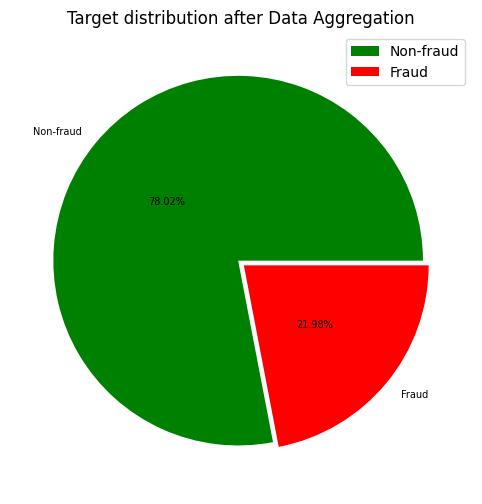

In [30]:
# Distribution of Non Fraud to Fraud instances.
print(dft['FLAG'].value_counts())

# Pie Chart for distribution.
pie, ax= plt.subplots(figsize= [8,6])
labels= ['Non-fraud', 'Fraud']
colors= ['green', 'red']
plt.pie(x= dft['FLAG'].value_counts(), autopct ='%.2f%%', explode= [0.02]*2, labels= labels, pctdistance= 0.5, textprops= {'fontsize': 7}, colors= colors)
plt.title('Target distribution after Data Aggregation')
plt.legend()

In [41]:
# Saving the new dataframe into the same google drive folder.
path = dir_path + '/' + 'aggregated_transaction_dataset_1500_2.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  dft.to_csv(f)

In [32]:
%pip install packaging

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
%pip install --pre pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 63.3 MB/s eta 0:

In [34]:
from pycaret.classification import *

In [35]:
dft= dft.replace('Fraud', 1)
dft= dft.replace('Non - Fraud', 0)

In [36]:
setup(dft, target= "FLAG", session_id= 85)

,Description,Value
0,Session id,85
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(19682, 19)"
4,Transformed data shape,"(19682, 19)"
5,Transformed train set shape,"(13777, 19)"
6,Transformed test set shape,"(5905, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [37]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9890,0.9982,0.9581,0.9918,0.9746,0.9676,0.9679,0.7450
xgboost,Extreme Gradient Boosting,0.9887,0.9981,0.9557,0.9928,0.9739,0.9667,0.9670,2.2290
gbc,Gradient Boosting Classifier,0.9864,0.9973,0.9445,0.9934,0.9683,0.9597,0.9602,3.5790
rf,Random Forest Classifier,0.9857,0.9974,0.9406,0.9941,0.9665,0.9574,0.9581,3.0190
et,Extra Trees Classifier,0.9848,0.9973,0.9363,0.9944,0.9644,0.9548,0.9555,1.2500
ada,Ada Boost Classifier,0.9825,0.9958,0.9412,0.9785,0.9594,0.9483,0.9486,0.8130
dt,Decision Tree Classifier,0.9767,0.9662,0.9475,0.9469,0.9470,0.9321,0.9322,0.2680
knn,K Neighbors Classifier,0.8175,0.8106,0.4934,0.6040,0.5428,0.4303,0.4340,0.6390
lr,Logistic Regression,0.8065,0.7066,0.1929,0.7221,0.2997,0.2314,0.2990,0.5830
lda,Linear Discriminant Analysis,0.7968,0.8895,0.1443,0.6778,0.2378,0.1740,0.2448,0.0940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=85, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

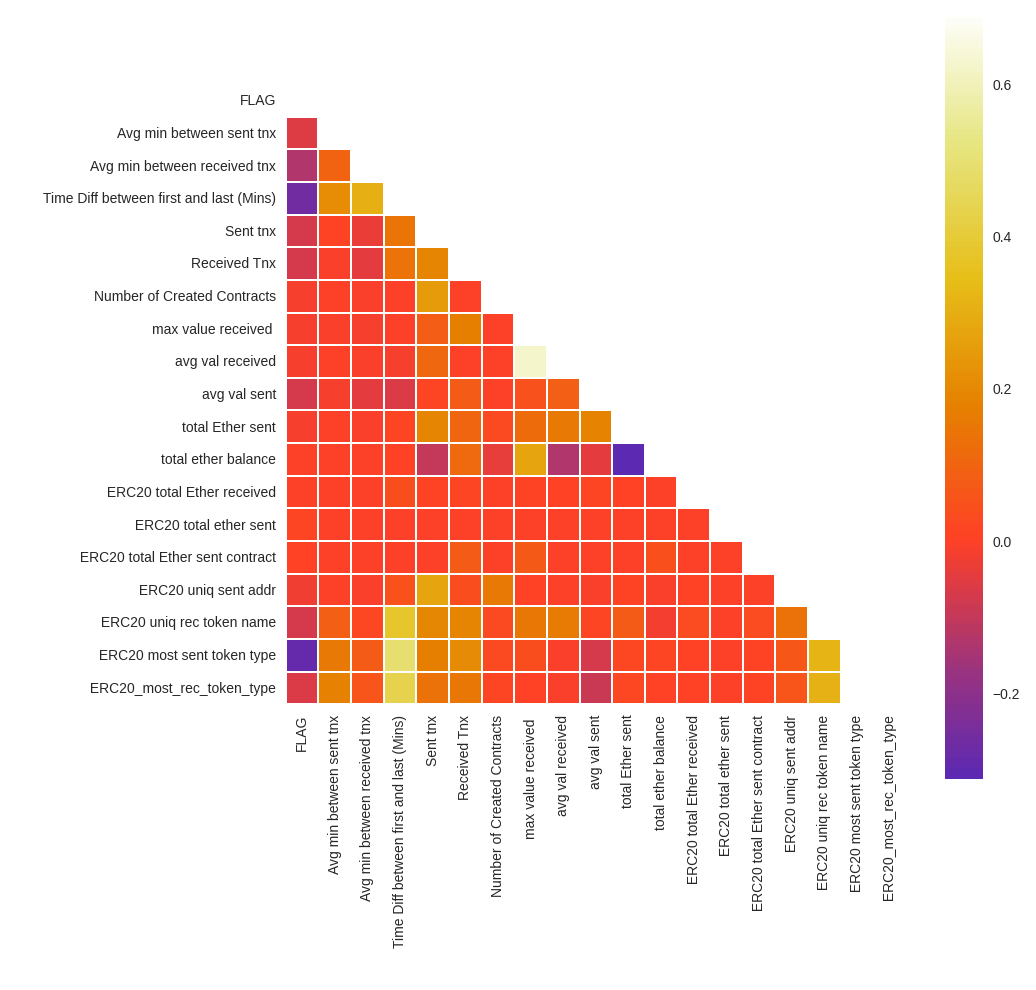

In [38]:
# Rechecking the Correlation matrix.
corr= dft.corr()

mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
with sns.axes_style('white'):
  fig, ax= plt.subplots(figsize= (10, 10))
  sns.heatmap(corr, mask= mask, annot= False, cmap= 'CMRmap', center= 0, linewidths= 0.1, square= True)

<hr>

In [ ]:
# # Obtain the dataset metadata.
# from sdv.metadata import SingleTableMetadata

# metadata = SingleTableMetadata()
# metadata.detect_from_dataframe(data= dfc)

# # Synthesizer learning for 1500 epochs.
# %%capture output
# from sdv.single_table import CTGANSynthesizer

# EPOCHS= 1500
# synthesizer = CTGANSynthesizer(metadata, epochs= EPOCHS, verbose= True, enforce_min_max_values= True)
# synthesizer.fit(dfc)

# # save model with a descriptive name that includes the dataset and epochs
# model_path = f'ctgan_model_ethereum_fraud_{EPOCHS}_epochs_1.pkl'
# synthesizer.save(model_path)

# # Generate Synthetic Samples.
# dfsyn = synthesizer.sample(num_rows= dfc.shape[0])

# # Concatenating both the datasets and generating new csv file.
# dft= pd.concat([dfc, dfsyn], ignore_index=True)
# path = dir_path + '/' + 'aggregated_transaction_dataset_1500_1.csv'

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   dft.to_csv(f)